# Image clustering for Bristol Medical School PGRS

## Table of Contents
* [Aim of the course](#Aim)
* [Data augmentation](#Data-augmentation)
* [Geometric Transfromations](#Geometric-Transfromations)
* [Rotate the image](#Rotate-the-image)
* [Flip image horizontally](#Flip-the-image-horizontally)
* [Flip the image vertically](#Flip-the-image-vertically)
* [Blur the image](#Blur-the-image)
* [Visualise all images including the original image](#Visualise-all-images-including-the-original-image)
* [Resources](#Resources)
* [General example - play ground](#General-example)

## Aim

To teach the concept of image clustering for analysis of medical images using a publicly available data set. The course will introduce ideas on data optimisation techniques with a focus on data augmentation, to improve machine learning in small imaging datasets. 

# Data optimisation
- Focusing on refining existing data by cleaning, structuring, and removing redundancies to make it more efficient for analysis.

**CLustering Multiple Images**

In the next step we are going to use this clustering technique to measure the surface area of dermatological features in a set of 3 images. This could be used as a technique to measure features in a large data set that are hard or tedious to quantify.

First we need to load and inspect the images in the same way we did in the previous exercise

Image 1 shape is (450, 600, 3)
Image 1 size is 810000


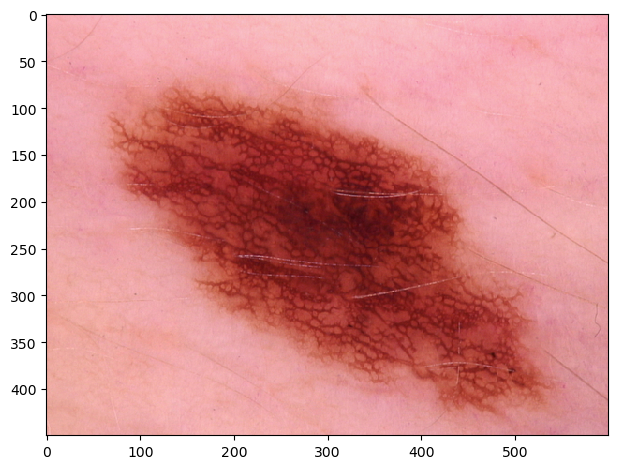

Image 2 shape is (450, 600, 3)
Image 2 size is 810000


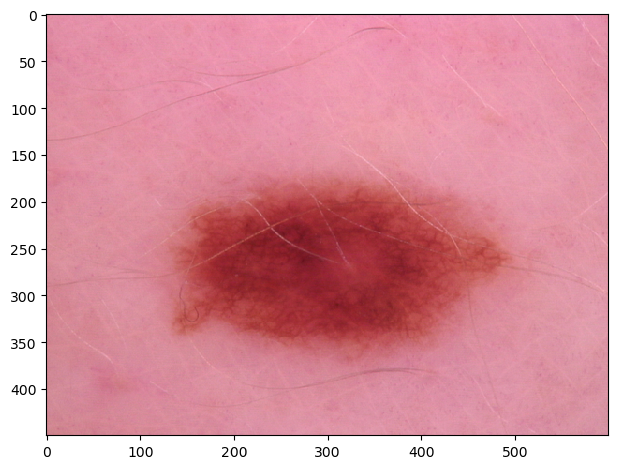

Image 3 shape is (450, 600, 3)
Image 3 size is 810000


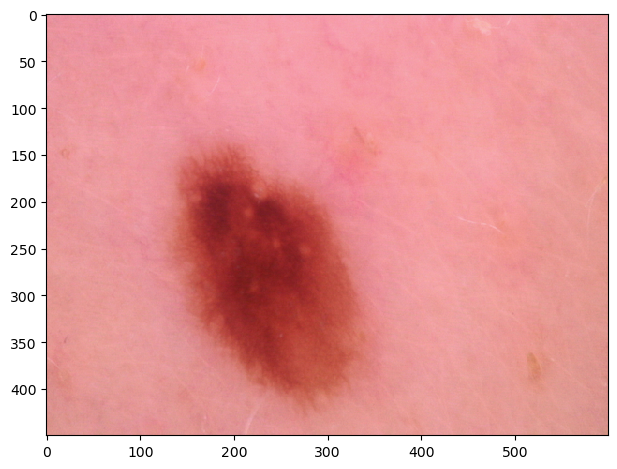

In [3]:
from PIL import Image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

#image 1
img1  = Image.open("./Data/Raw/mole.jpg") #make sure to specify your own working directory
img1 = np.array(img1)
print('Image 1 shape is', img1.shape)
print("Image 1 size is", img1.size)

%matplotlib inline
io.imshow(img1)
plt.show()

#image 2
img2  = Image.open("C:/Users/bo24669/OneDrive - University of Bristol/Documents/04. Research Advocate/Stretch/mole2.jpg") #make sure to specify your own working directory
img2 = np.array(img2)
print('Image 2 shape is', img2.shape)
print("Image 2 size is", img2.size)

%matplotlib inline
io.imshow(img2)
plt.show()

#image 3
img3  = Image.open("C:/Users/bo24669/OneDrive - University of Bristol/Documents/04. Research Advocate/Stretch/mole3.jpg") #make sure to specify your own working directory
img3 = np.array(img3)
print('Image 3 shape is', img3.shape)
print("Image 3 size is", img3.size)

%matplotlib inline
io.imshow(img3)
plt.show()

We also need to flatten them and convert into a pandas data frames

In [5]:
from pandas import DataFrame
from matplotlib import colors

#image 1
img1 = np.array(img1, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(img1.shape)  # Get the current shape
img1_array = np.reshape(img1, (w * h, d))  # Reshape to to 2D

pixels1 = DataFrame(img1_array, columns=["Red", "Green", "Blue"]) #convert to pandas
pixels1["colour"] = [colors.to_hex(p) for p in img1_array] #add colours column 
print(pixels1)

#image 2
img2 = np.array(img2, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(img2.shape)  # Get the current shape
img2_array = np.reshape(img2, (w * h, d))  # Reshape to to 2D

pixels2 = DataFrame(img2_array, columns=["Red", "Green", "Blue"]) #convert to pandas
pixels2["colour"] = [colors.to_hex(p) for p in img2_array] #add colours column 
print(pixels2)

#image 3
img3 = np.array(img3, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(img3.shape)  # Get the current shape
img3_array = np.reshape(img3, (w * h, d))  # Reshape to to 2D

pixels3 = DataFrame(img3_array, columns=["Red", "Green", "Blue"]) #convert to pandas
pixels3["colour"] = [colors.to_hex(p) for p in img3_array] #add colours column 
print(pixels3)

             Red     Green      Blue   colour
0       0.949020  0.662745  0.698039  #f2a9b2
1       0.964706  0.678431  0.713725  #f6adb6
2       0.964706  0.678431  0.713725  #f6adb6
3       0.964706  0.686275  0.717647  #f6afb7
4       0.968627  0.690196  0.705882  #f7b0b4
...          ...       ...       ...      ...
269995  0.847059  0.572549  0.611765  #d8929c
269996  0.850980  0.576471  0.607843  #d9939b
269997  0.847059  0.572549  0.603922  #d8929a
269998  0.847059  0.564706  0.607843  #d8909b
269999  0.850980  0.568627  0.611765  #d9919c

[270000 rows x 4 columns]
             Red     Green      Blue   colour
0       0.890196  0.560784  0.650980  #e38fa6
1       0.894118  0.564706  0.654902  #e490a7
2       0.886275  0.556863  0.647059  #e28ea5
3       0.874510  0.564706  0.639216  #df90a3
4       0.878431  0.568627  0.654902  #e091a7
...          ...       ...       ...      ...
269995  0.843137  0.560784  0.647059  #d78fa5
269996  0.823529  0.556863  0.639216  #d28ea3
269997 

**Exercise**: At the moment we are loading and editing each image seperately - this can be time consuming with large data sets. How can we make this process faster? 

*Answer*: use a loop - incldue example of a for loop

To run the clustering on a set of images we need to stack the data frames into one. We will add a new column to indicate which image the data came from. 

In [9]:
#first we need to add a new column to our data sets to indicate which image they came from 
import pandas as pd

pixels1['image'] = '1'
pixels2['image'] = '2'
pixels3['image'] = '3'

pixels = pd.concat([pixels1, pixels2, pixels3], ignore_index = True, axis = 0) #axis 0 indicates stacking verticallu

print(pixels)


             Red     Green      Blue   colour image
0       0.949020  0.662745  0.698039  #f2a9b2     1
1       0.964706  0.678431  0.713725  #f6adb6     1
2       0.964706  0.678431  0.713725  #f6adb6     1
3       0.964706  0.686275  0.717647  #f6afb7     1
4       0.968627  0.690196  0.705882  #f7b0b4     1
...          ...       ...       ...      ...   ...
809995  0.827451  0.560784  0.525490  #d38f86     3
809996  0.831373  0.564706  0.521569  #d49085     3
809997  0.839216  0.580392  0.525490  #d69486     3
809998  0.839216  0.580392  0.525490  #d69486     3
809999  0.823529  0.576471  0.509804  #d29382     3

[810000 rows x 5 columns]


**Exercise** Explore the data in the same was as the previous exercise. Do you notice anything from the correlations?

We can now run K-means clustering in the same way as before. First by sampling a subset of pixels and assign our cluster centres. In order to compare the size of the dermatological features across the images, we want to measure the pixels that are and aren't dark space. We could try to use 2 clusters for this.

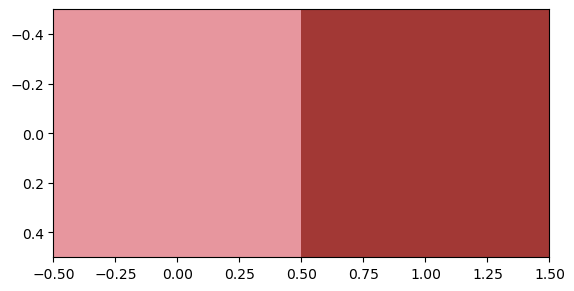

In [23]:
pixels_sample = pixels.sample(frac=0.05) #look at 5% of the data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init="auto").fit(pixels_sample[["Red", "Green", "Blue"]])
plt.imshow([kmeans.cluster_centers_])
plt.show()


In the same way as before see how it looks compared to the original image. Does two clusters sufficiently define the dark areas. **NOTE** *Could make this an exercise?*

We can now run our clustering with our whole data set.

In [25]:
labels = kmeans.predict(pixels[["Red", "Green", "Blue"]])
labels

array([0, 0, 0, ..., 0, 0, 0])

Now we have used the clustering algorithm to cluster pixels into dark and light areas, we can manipulate our data frame to compare the size of the features in the images. 

First we want to add the clustering array to the pandas data frame 

In [27]:
#add the clustering array as a new column 

pixels['cluster'] = labels.tolist()
print(pixels)

             Red     Green      Blue   colour image  cluster
0       0.949020  0.662745  0.698039  #f2a9b2     1        0
1       0.964706  0.678431  0.713725  #f6adb6     1        0
2       0.964706  0.678431  0.713725  #f6adb6     1        0
3       0.964706  0.686275  0.717647  #f6afb7     1        0
4       0.968627  0.690196  0.705882  #f7b0b4     1        0
...          ...       ...       ...      ...   ...      ...
809995  0.827451  0.560784  0.525490  #d38f86     3        0
809996  0.831373  0.564706  0.521569  #d49085     3        0
809997  0.839216  0.580392  0.525490  #d69486     3        0
809998  0.839216  0.580392  0.525490  #d69486     3        0
809999  0.823529  0.576471  0.509804  #d29382     3        0

[810000 rows x 6 columns]


We can then plot the amount of dark space for each image  

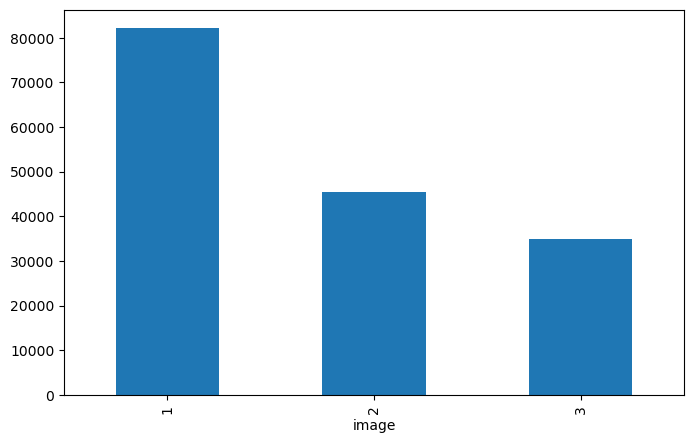

In [33]:
# Filter only rows where cluster == 0
pixels_fil = pixels[pixels["cluster"] == 1]

# Count occurrences of cluster 0 per image
dark_counts= pixels_fil["image"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
dark_counts.plot(kind="bar")
plt.show()

In a real data set we would have lots of different images. Using clustering this way would save time in measuring images. 

Can you think of other applications? Cell types on slides - how many clusters would you want then? 

# Data augmentation
- Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data.

- Aimed at creating new data points, manipulating existing data to increase the size and diversity of a dataset.

**Why is it important?**

1. Enhanced Model performance.     
   Data augmentation techniques help enrich datasets by creating many variations of existing data. This provides a larger dataset for training and enables a model to encounter more diverse features. The augmented data helps the model better generalize to unseen data and improve its overall performance in real-world environments. 
2. To prevent models from overfitting.       
   Overfitting is the undesirable ML behavior where a model can accurately provide predictions for training data but it struggles with new data. If a model trains only with a narrow dataset, it can become overfit and can give predictions related to only that specific data type.
3. The initial training set is too small. 
4. To improve the model accuracy.       
   If you need to train a deep learning model on sensitive data, you can use augmentation techniques on the existing data to create synthetic data.
6. To reduce the operational cost of labeling and cleaning the raw dataset.      
   Data augmentation techniques increase the effectiveness of smaller datasets, vastly reducing the dependency on large datasets in training environments.


**Example use case**
1. Health care - Image analysis.     
   Useful technology in medical imaging because it helps improve diagnostic models that detect, recognize, and diagnose diseases based on images. The creation of an augmented image provides more training data for models, especially for rare diseases that lack source data variations. The production and use of synthetic patient data advances medical research while respecting all data privacy considerations.

**How do you achieve Image data augmentation?**

- In image processing, applying transformations like rotations, flips, or color adjustments to existing images can help models generalize better.

- Other transformations are:

  i) *Color space transformations:* randomly change RGB color channels, contrast, and brightness.
  ii) *Kernel filters:* randomly change the sharpness or blurring of the image. 
  iii) *Random erasing:* delete some part of the initial image.
  iv) *Mixing images:* blending and mixing multiple images. 


## Geometric Transfromations

![Geometrictransformations](../Figures/Image_Transformations.png)


In [2]:
# Load the necessary libraries
import skimage
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data   ## Inbuilt dataset within scikit-image
from skimage import io, transform, filters, exposure
matplotlib.rcParams['font.size'] = 18

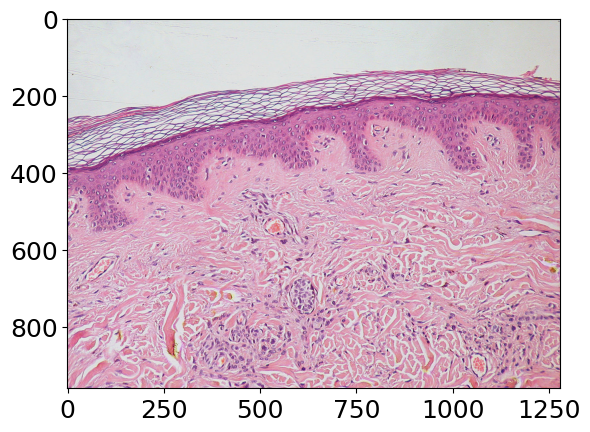

In [3]:
# Load inbuilt skin dataset from scikit-image
image = data.skin()
image # displays an array representing the image
plt.imshow(image) # Visualise the original image

## Rotate the image

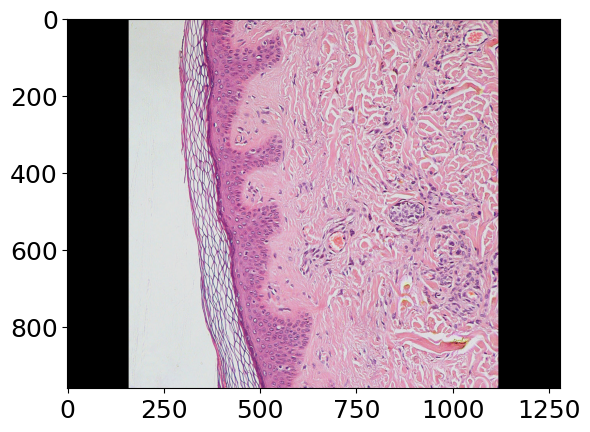

In [4]:
# Rotate the image
rotated = transform.rotate(image, 90)  # Rotate 90 degrees
plt.imshow(rotated)

## Flip the image horizontally

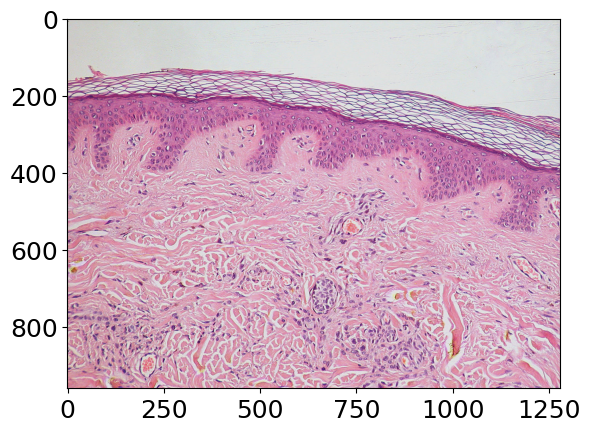

In [5]:
# Flip the image horizontally
flipped_h = image[:, ::-1]
plt.imshow(flipped_h) 

## Flip the image vertically

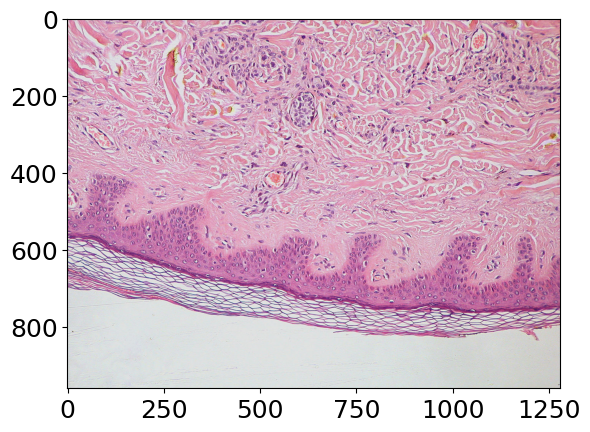

In [6]:
flipped_v = image[::-1, :]  
plt.imshow(flipped_v)

## Blur the image

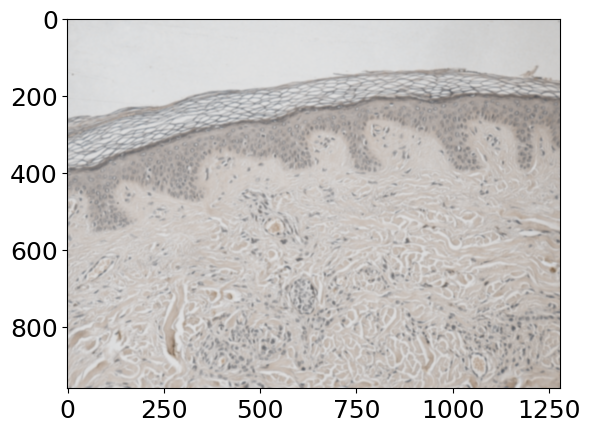

In [7]:
# Blur the image
blurred = filters.gaussian(image, sigma=2)
plt.imshow(blurred)

# Visualise all images including the original image

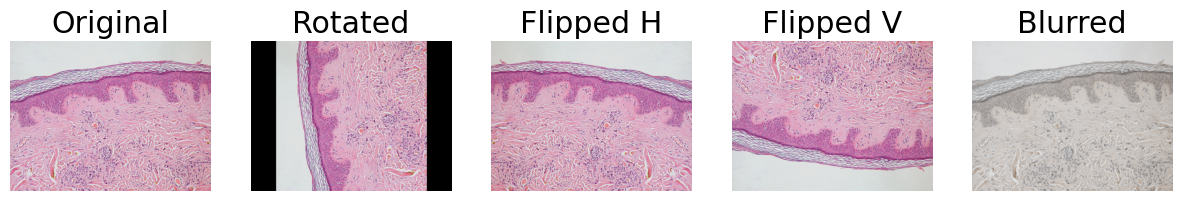

In [9]:
# Visualise all the images all together
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
titles = ["Original", "Rotated", "Flipped H", "Flipped V", "Blurred"]
images = [image, rotated, flipped_h, flipped_v, blurred]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.show()

# Resources

1. [Data augmentation using AWS](https://aws.amazon.com/what-is/data-augmentation/#:~:text=Data%20augmentation%20is%20the%20process,machine%20learning%20(ML)%20models.)

2. [Scikit-image](https://scikit-image.org/docs/stable/user_guide/install.html)

In [ ]:
### Generic example

### General example

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.3622055261839917..1.0000000000000002].


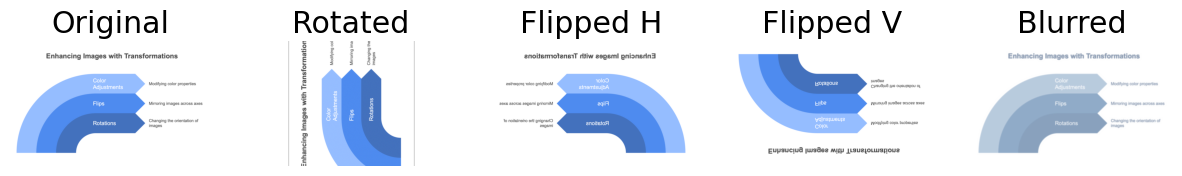

In [10]:
### Generic example

# Load original image
img = io.imread("../Figures/Image_Transformations.png")  

# Transformations (Rotate, flip, blur)

# Rotate the image
rotated = transform.rotate(img, 90)  # Rotate 90 degrees

# Flip the image (Horizontally and vertically)
flipped_h = img[:, ::-1]  # Flip horizontally
flipped_v = img[::-1, :]  # Flip vertically

# Blur the image
blurred = filters.gaussian(img, sigma=2)  # Apply Gaussian blur


# Visualise the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
titles = ["Original", "Rotated", "Flipped H", "Flipped V", "Blurred"]
images = [img, rotated, flipped_h, flipped_v, blurred]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.show()